# Homework 3
##### Bayesian Machine Learning; DS 6040
##### Jacqueline Unciano

In [ ]:
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
from scipy import special, stats
import numpy as np
import seaborn as sns
import os

### READ ME

Hi Navya~~~ I gave up :)

The code doesn't work and even when I copied the code from my peers to see if my code was just wrong... it still didn't work. I'm at my wits end and so I gave up. Even my explanations don't really make any sense, I'm so... frustrated QAQ. I'm only turning this in because maybe I can get like 10% on it or something lmao.

### Honor Code

I have neither given nor received any unauthorised aid on this assignment.

--Jacqui Unciano

## Question 1

(10) Based on the analysis we did in class comparing systolic blood pressure among men in the South African study [1], you are now asked to
extend this analysis by comparing low density lipoprotein (ldl) levels between the same two groups in the study: those with and without coronary
heart disease. Perform this analysis and comment on whether you find a
statistically significant difference between the groups for this variable. To
do this analysis you will use the CHD data set (CHDdata.cv).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CHDdata.csv")

In [ ]:
data1.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
data1.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

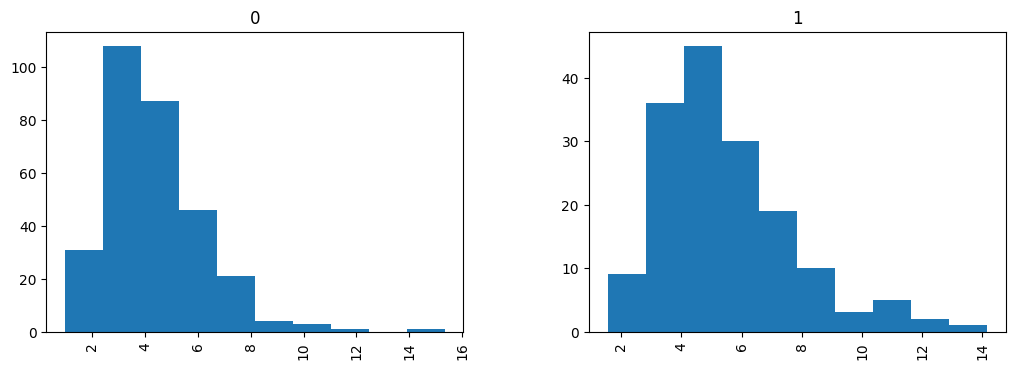

In [ ]:
df1 = data1[["ldl", "chd"]]
df1.hist("ldl", by="chd", figsize=(12, 4))

In [ ]:
y0 = df1.loc[df1["chd"]==0]['ldl']
y1 = df1.loc[df1["chd"]==1]["ldl"]

In [ ]:
random_seed = 134536
cores = 4
μ_prior = df1['ldl'].mean()
σ_prior = df1['ldl'].std() * 2

# prior for Std
σ_low = 1
σ_high = 100

with pm.Model() as model:
    CHD0_mean = pm.Normal("CHD0_mean", mu=μ_prior, sigma=σ_prior)
    CHD1_mean = pm.Normal("CHD1_mean", mu=μ_prior, sigma=σ_prior)
    CHD0_std = pm.Uniform("CHD0_std", lower=σ_low, upper=σ_high)
    CHD1_std = pm.Uniform("CHD1_std", lower=σ_low, upper=σ_high)
    ν = pm.Exponential("ν", 1/29)
    CHD0 = pm.StudentT("No_CHD", nu=ν, mu=CHD0_mean, sigma=CHD0_std, observed=y0)
    CHD1 = pm.StudentT("CHD", nu=ν, mu=CHD1_mean, sigma=CHD1_std, observed=y1)
    diff_of_means = pm.Deterministic("difference of means", CHD0_mean - CHD1_mean)
    diff_of_stds = pm.Deterministic("difference of stds", CHD0_std - CHD1_std)
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((CHD0_std ** 2 + CHD1_std ** 2) / 2)
    )

    chd_trace=pm.sample(random_seed = random_seed, cores = cores)

array([[<Axes: title={'center': 'CHD0_mean'}>,
        <Axes: title={'center': 'CHD0_mean'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'CHD1_mean'}>,
        <Axes: title={'center': 'CHD1_mean'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'CHD0_std'}>,
        <Axes: title={'center': 'CHD0_std'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'CHD1_std'}>,
        <Axes: title={'center': 'CHD1_std'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'ν'}>,
        <Axes: title={'center': 'ν'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'difference of means'}>,
        <Axes: title={'center': 'difference of means'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'difference of stds'}>,
        <Axes: title={'center': 'difference of stds'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<

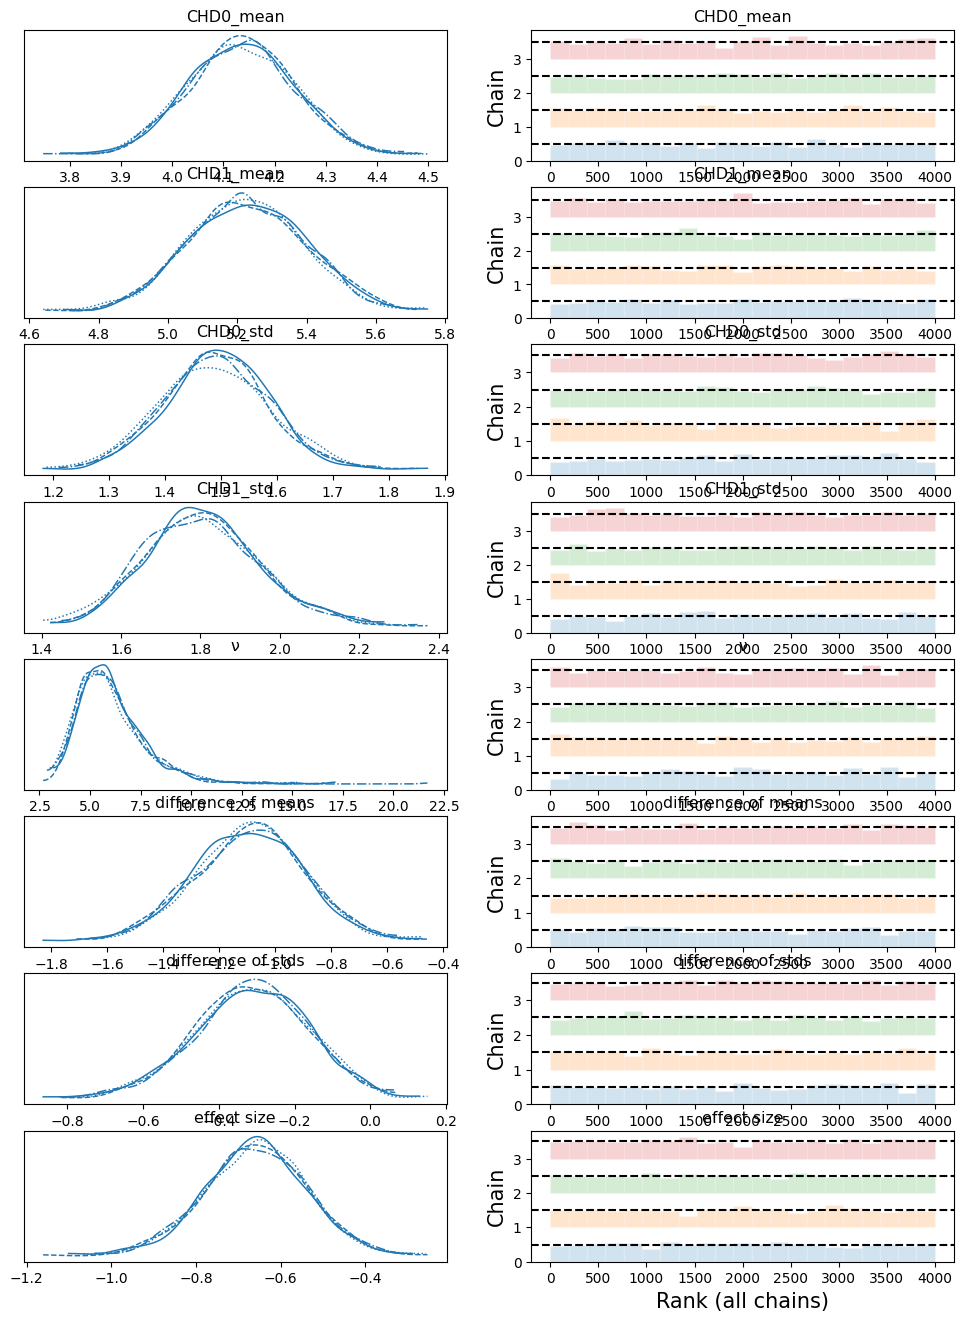

In [ ]:
az.plot_trace(chd_trace, kind = "rank_bars")

In [ ]:
az.summary(chd_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
CHD0_mean,4.136,0.102,3.948,4.324,0.002,0.001,3253.0,3181.0,1.0
CHD1_mean,5.227,0.169,4.917,5.545,0.003,0.002,2995.0,2851.0,1.0
CHD0_std,1.492,0.093,1.327,1.677,0.002,0.001,2631.0,2150.0,1.0
CHD1_std,1.806,0.147,1.544,2.100,0.003,0.002,2577.0,2124.0,1.0
ν,6.048,1.734,3.408,9.307,0.036,0.026,2334.0,2479.0,1.0
difference of means,-1.091,0.194,-1.459,-0.734,0.003,0.002,3539.0,3012.0,1.0
difference of stds,-0.314,0.148,-0.594,-0.040,0.002,0.002,4074.0,2969.0,1.0
effect size,-0.660,0.120,-0.896,-0.439,0.002,0.001,3754.0,2953.0,1.0


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

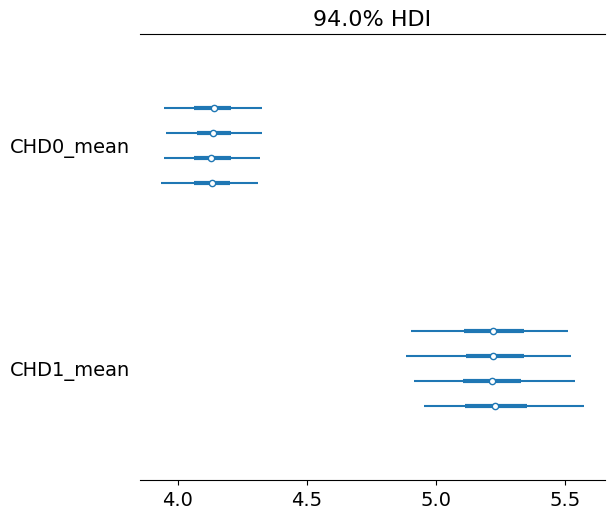

In [ ]:
az.plot_forest(chd_trace, var_names = ['CHD0_mean','CHD1_mean'])

### Answer 1

Yes, there is a statistically significant difference in ldl between those with chd and those without chd.

## Question 2

(30) High concentrations of certain types of algae can cause algae blooms
in rivers and lakes. These blooms can have deleterious effects on the
wildlife in the environment in the area to include infecting the drinking
water used by human populations. The European Union has a goal to
develop methods that can monitor water for harmful algae concentrations
and predict algae blooms. They would like to do this using just chemical
tests since these are quicker and cheaper than biological analysis which is
more accurate. The data come from the COIL international data analysis
competition (1999) and consist of 200 samples of water from the same
river over a period of 4 months. There are 11 predictor variables that
describe the season of the year when the samples were collected, the size
and speed of the river at time of collection, and 8 chemical m.

For each of these predictor variable observations, the data set also contains
measurements of 7 different harmful algae, labeled a1-a7 but not named.
For this work we will use the a1 measurements as the response variable.
With algae.csv data and the stated goal of the EU perform the following
tasks and answer the stated questions.asurements:

In [ ]:
a = pd.read_csv("/content/drive/My Drive/Colab Notebooks/algae.csv")
aT = pd.read_csv("/content/drive/My Drive/Colab Notebooks/algaeTest.csv", header=None)

In [ ]:
a.head()

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0


In [ ]:
aT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,summer,small_,medium,7.95000,5.7,57.33300,2.46000,273.33301,295.66699,380.00000,XXXXXXX,1.2,36.5,1.9,0.0,1.2,0.0,28.0
1,winter,small_,medium,7.98000,8.8,59.33300,7.39200,286.66699,33.33300,138.00000,7.10000,1.2,0.0,0.0,0.0,23.2,46.4,0.0
2,summer,small_,medium,8.00000,7.2,80.00000,1.95700,174.28600,47.85700,113.71400,4.50000,7.0,23.0,6.5,1.4,21.2,0.0,2.1
3,spring,small_,high__,8.35000,8.4,68.00000,3.02600,458.00000,45.20000,111.80000,3.20000,1.4,38.2,2.4,0.0,4.8,1.0,1.2
4,spring,small_,medium,8.10000,13.2,19.00000,0.00000,130.00000,6.00000,40.00000,2.00000,3.9,55.4,8.4,0.0,0.0,0.0,0.0


(a) Perform exploratory data analysis (EDA) to include as minimum a
review of the summary statistics for the data. Briefly explain how
this EDA informs the next steps of your work.

In [ ]:
a.columns

Index(['season', 'size', 'speed', 'mxPH', 'mnO2', 'Cl', 'NO3', 'NH4', 'oPO4',
       'PO4', 'Chla', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7'],
      dtype='object')

In [ ]:
a.describe()

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
count,199.000000,198.000000,190.000000,198.000000,198.000000,198.000000,198.000000,188.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,8.011734,9.117778,43.636279,3.282389,501.295828,73.590596,137.882101,13.971197,16.923500,7.458500,4.309500,1.992500,5.064500,5.96400,2.495500
std,0.598305,2.391253,46.831311,3.776474,1962.545461,91.136436,128.993738,20.495920,21.348376,11.028202,6.948537,4.417404,7.491401,11.66071,5.158564
min,5.600000,1.500000,0.222000,0.050000,5.000000,1.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.700000,7.725000,10.981250,1.296000,38.333250,15.700000,41.375250,2.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,8.060000,9.800000,32.730000,2.675000,103.166500,40.150000,103.285500,5.475000,6.950000,3.000000,1.550000,0.000000,1.900000,0.00000,1.000000
75%,8.400000,10.800000,57.823500,4.446250,226.950007,99.333250,213.750000,18.307500,24.800000,11.375000,4.925000,2.400000,7.500000,6.92500,2.400000
max,9.700000,13.400000,391.500000,45.650000,24064.000000,564.599980,771.599980,110.456000,89.800000,72.600000,42.800000,44.600000,44.400000,77.60000,31.600000


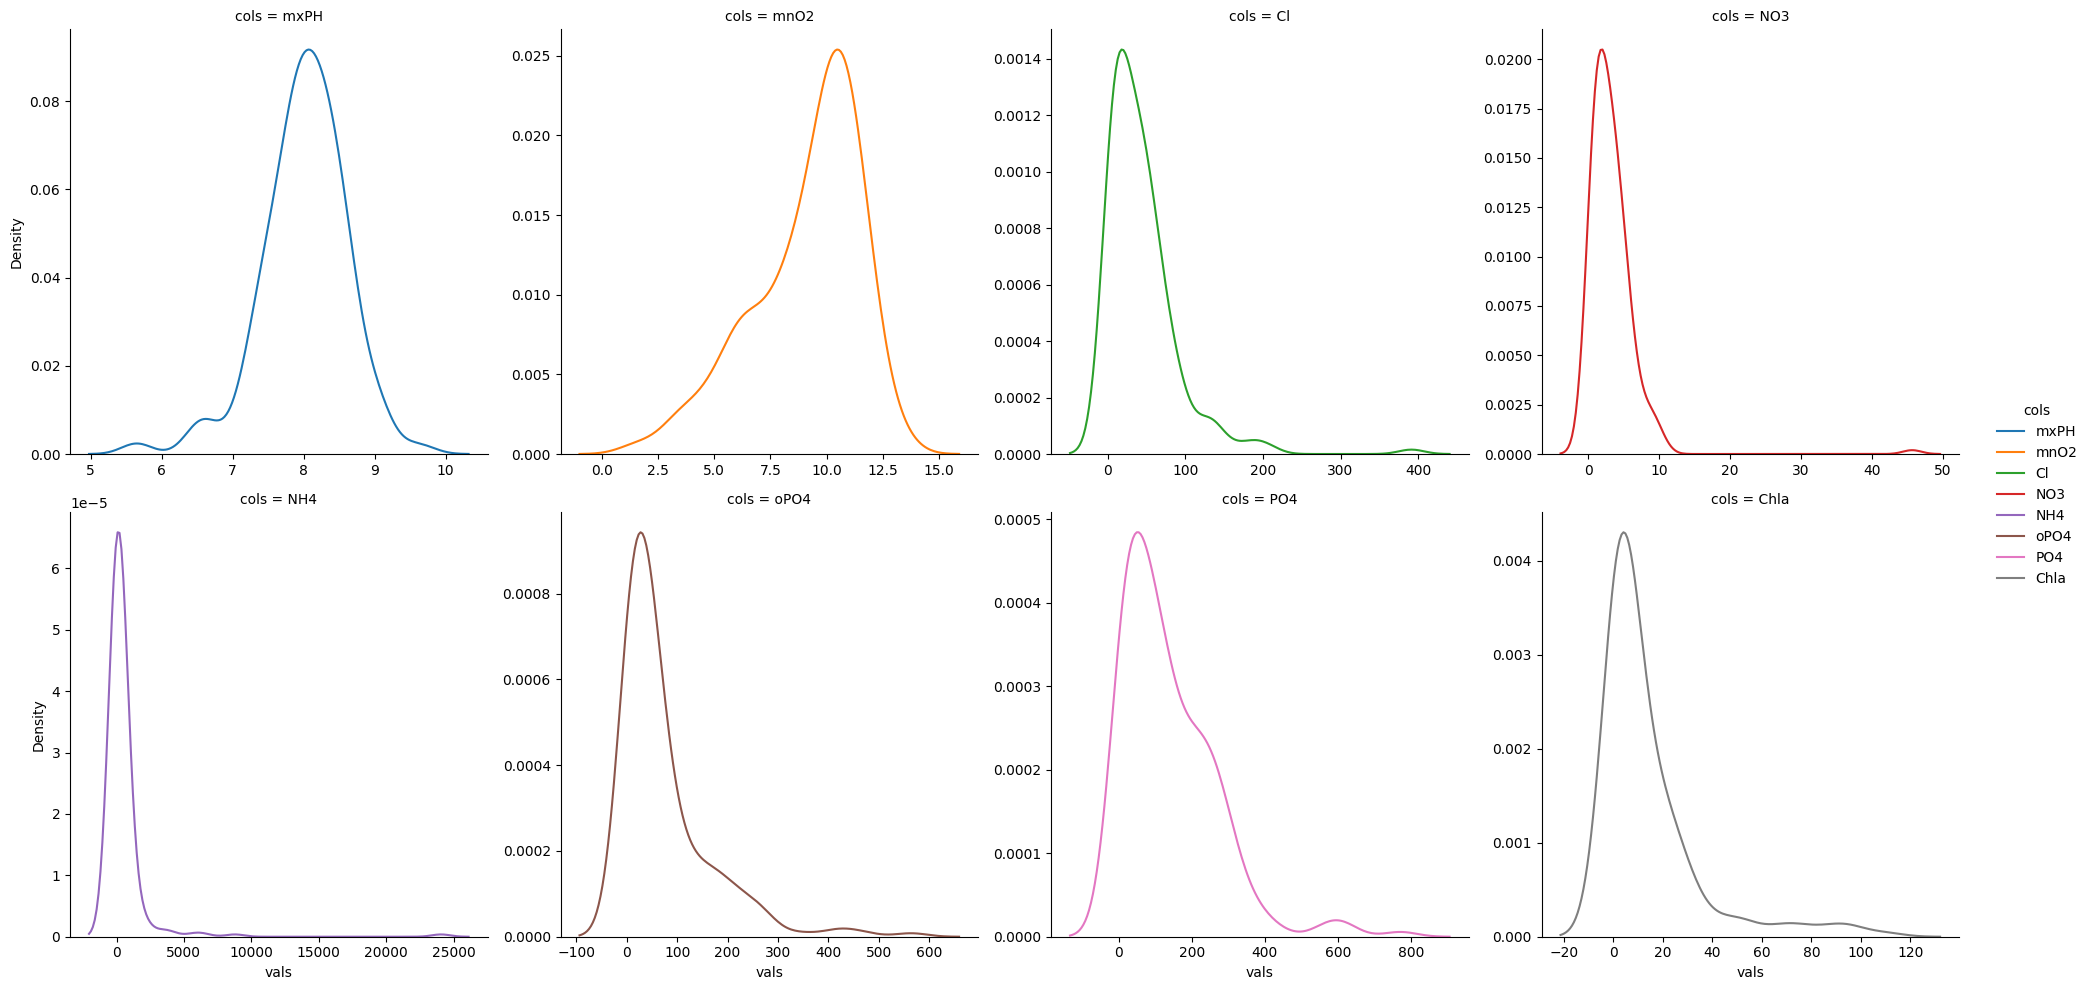

In [ ]:
a2 = a.loc[:, ['mxPH', 'mnO2', 'Cl', 'NO3', 'NH4', 'oPO4',
       'PO4', 'Chla']]
df = a2.melt(var_name='cols',  value_name='vals')

sns.displot(kind='kde', data=df, col='cols', col_wrap=4, x='vals', hue="cols", facet_kws={'sharey': False, 'sharex': False})

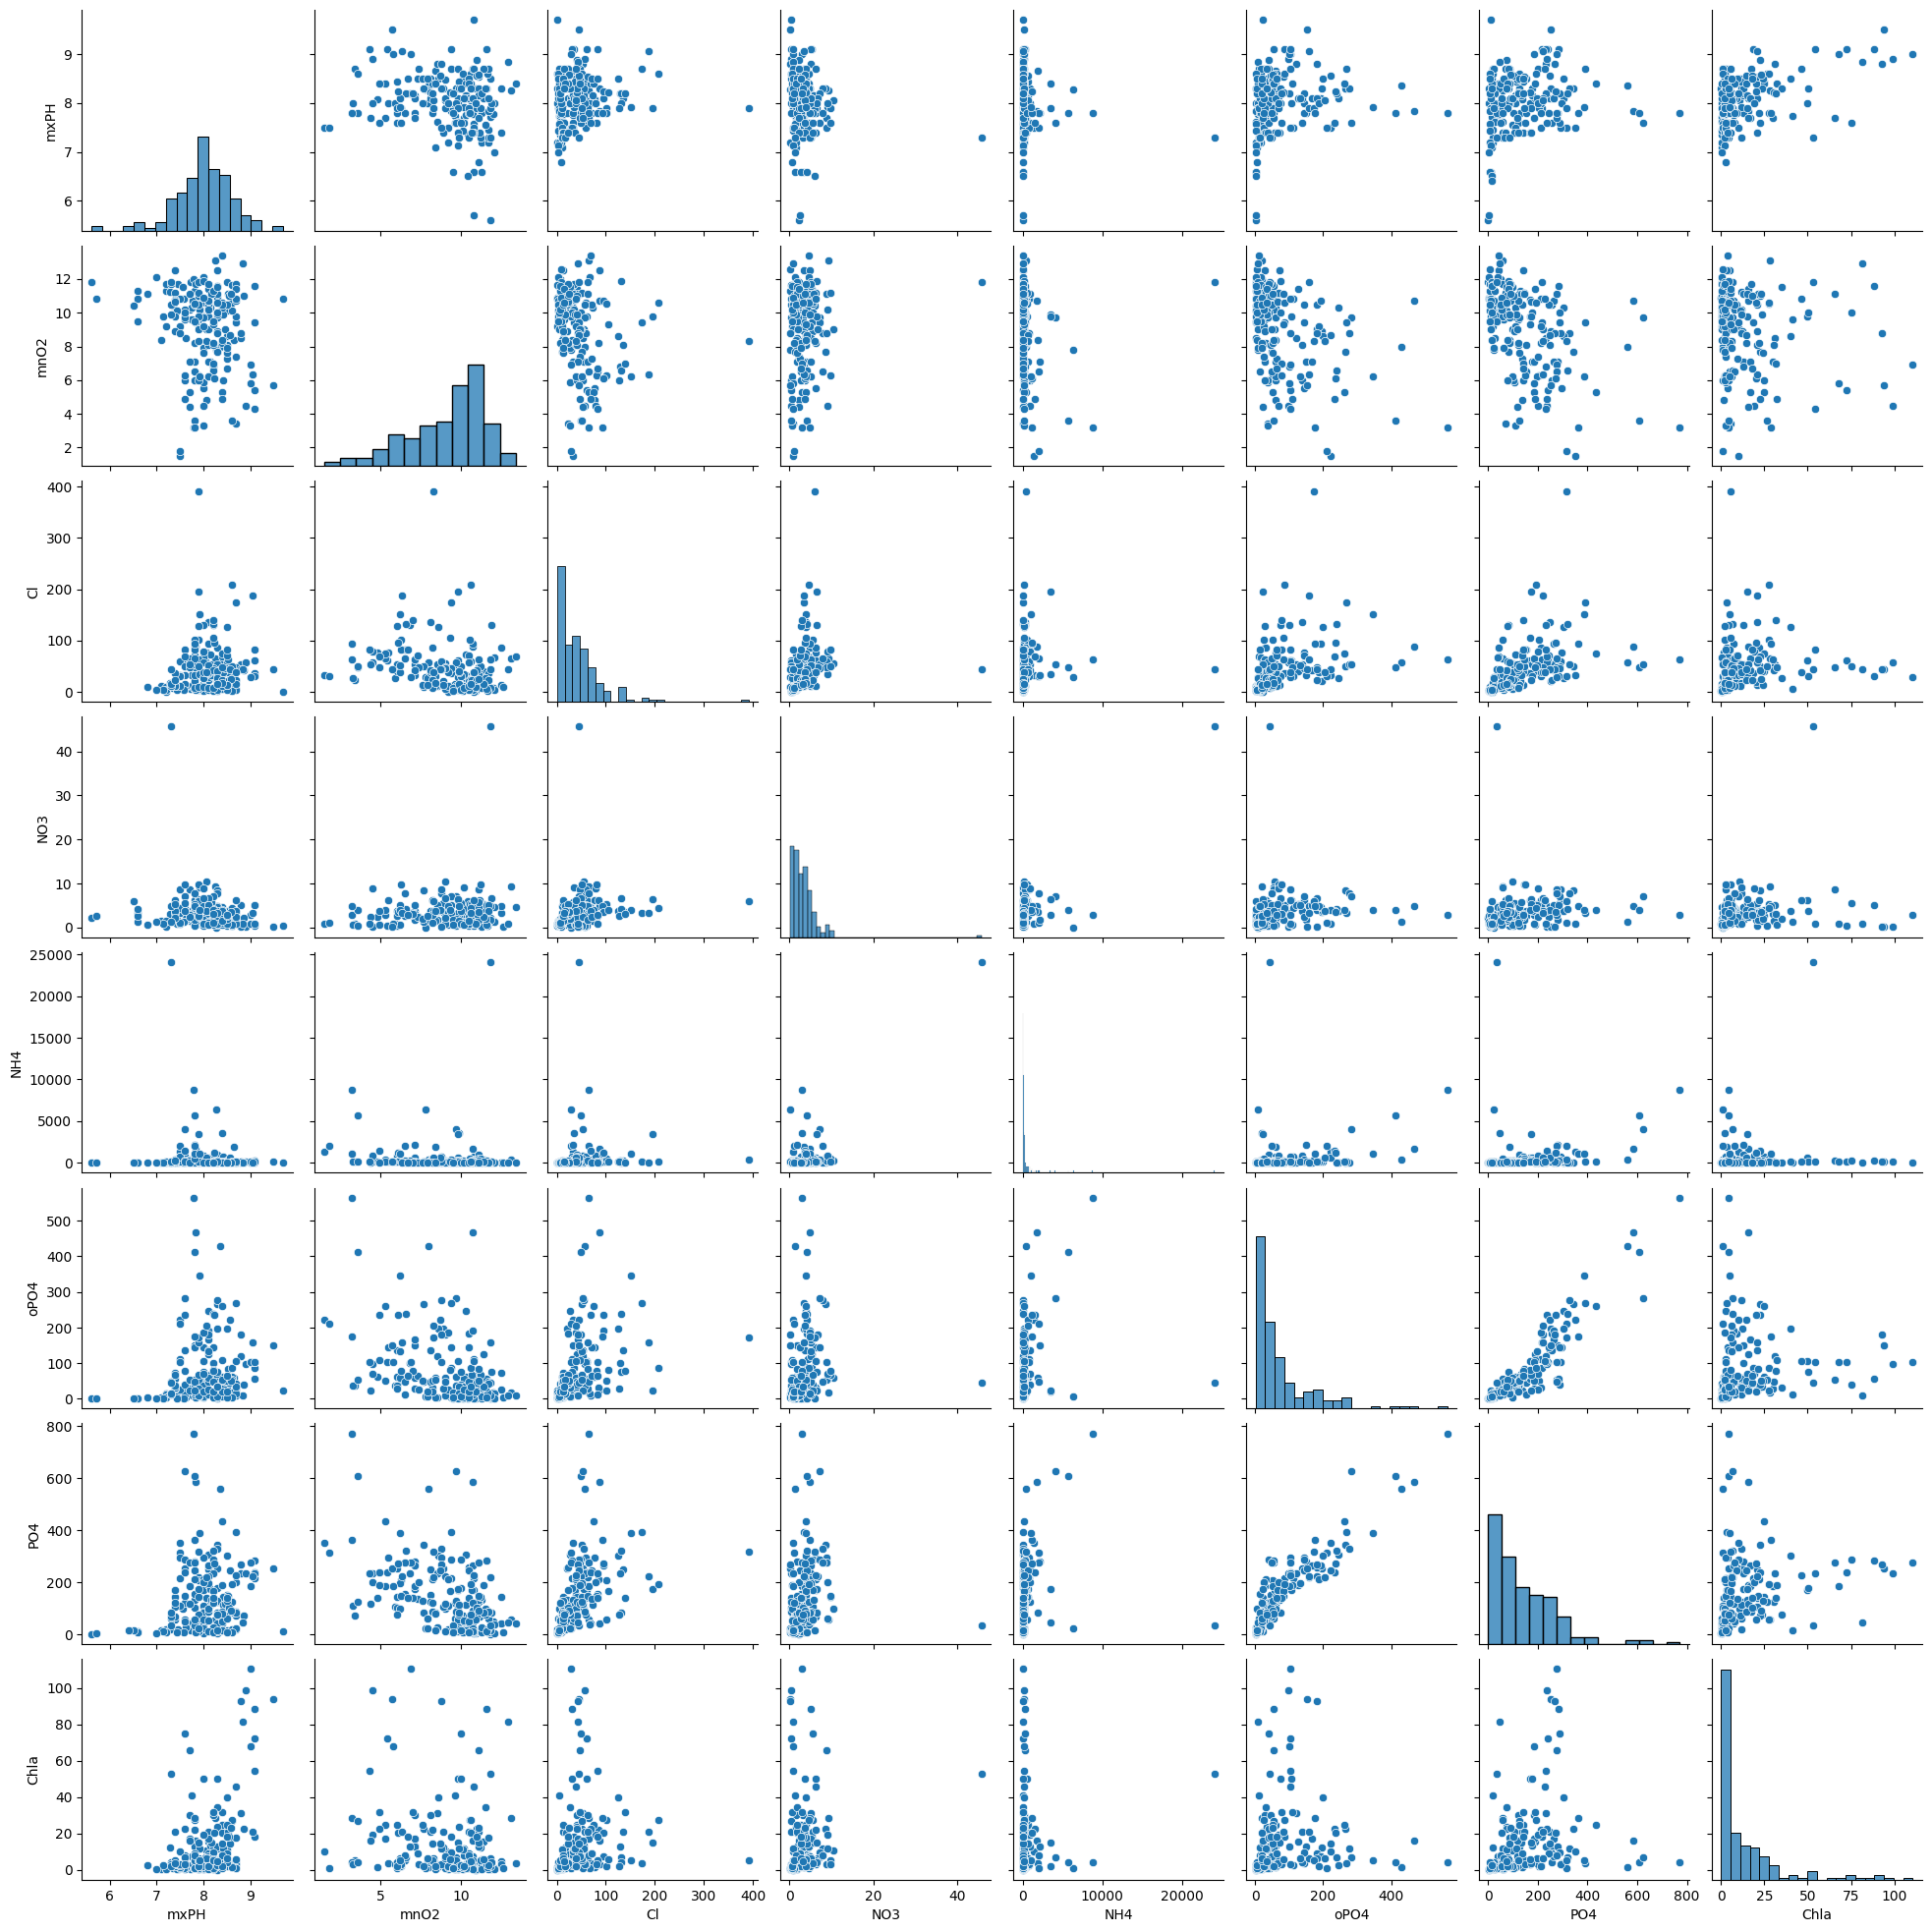

In [ ]:
sns.pairplot(a2)

               a1                 
             mean        std count
season                            
autumn  17.745000  21.611203    40
spring  16.649057  23.093786    53
summer  16.113333  17.723067    45
winter  17.216129  22.492558    62


<Axes: xlabel='a1', ylabel='Density'>

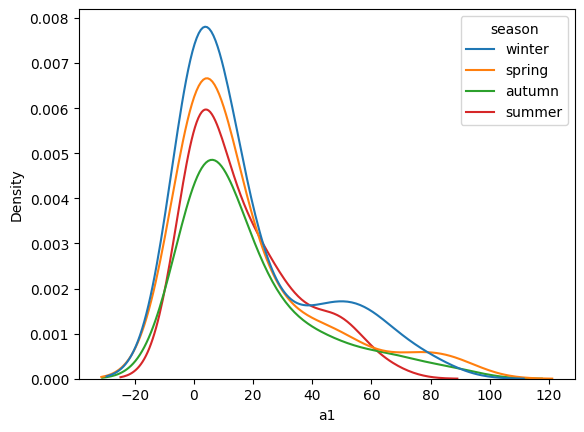

In [ ]:
df = a[["season", "a1"]]
print(df.groupby("season").agg(['mean', 'std', 'count']))
sns.kdeplot(x="a1", hue="season", data=df)

               a1                 
             mean        std count
size                              
large   11.353333  16.458178    45
medium  11.267857  17.163124    84
small   27.145070  24.734538    71


<Axes: xlabel='a1', ylabel='Density'>

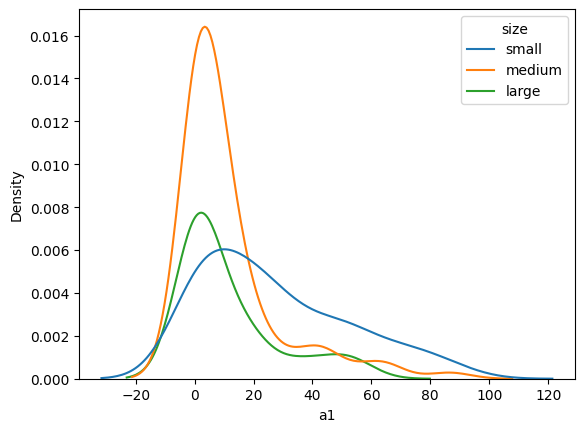

In [ ]:
df = a[["size", "a1"]]
print(df.groupby("size").agg(['mean', 'std', 'count']))
sns.kdeplot(x="a1", hue="size", data=df)

               a1                 
             mean        std count
speed                             
high    24.345238  22.209123    84
low      9.209091  13.164758    33
medium  12.479518  20.946976    83


<Axes: xlabel='a1', ylabel='Density'>

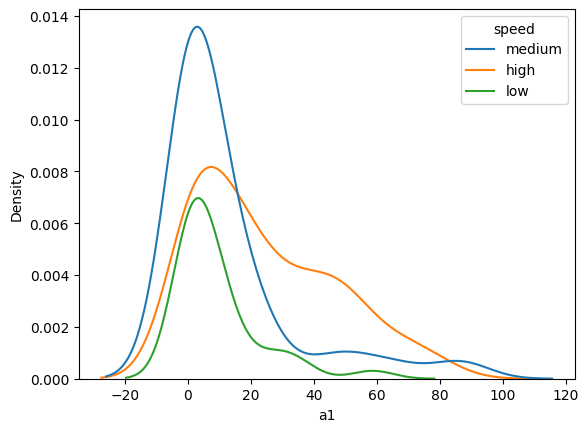

In [ ]:
df = a[["speed", "a1"]]
print(df.groupby("speed").agg(['mean', 'std', 'count']))
sns.kdeplot(x="a1", hue="speed", data=df)

### Answer 2.A

The graphs of the categorical variables show this distribution of the data for each category. Generally, the data follows the same distribution(I'm thinking normal or T distribution). Knowing the data's distribution will also help with choosing the prior parameters when building the model.The table with the statistics for the numerical data also helps with planning on how to deal with outliers (do we want to include or exclude them? I will be keeping them in for siplicity).

(b) Clean the data by identifying missing values and use the following
strategy to estimate missing values: 1. For continuous (real-valued)
data use the mean; 2. For discrete (integer valued) use the median;
and 3. For categorical or nominal data use the mode. Then scale the
predictor variables (subtract the mean and divide by the standard
deviation) and code the categorical variables. Explain why you are
doing this. Reparameterize the response variable using a log transform and explain why you are doing this.

In [ ]:
a.isna().sum()

season     0
size       0
speed      0
mxPH       1
mnO2       2
Cl        10
NO3        2
NH4        2
oPO4       2
PO4        2
Chla      12
a1         0
a2         0
a3         0
a4         0
a5         0
a6         0
a7         0
dtype: int64

In [ ]:
a.mxPH = a.mxPH.replace(np.NAN, a.mxPH.mean())
a.mnO2 = a.mnO2.replace(np.NAN, a.mnO2.mean())
a.Cl = a.Cl.replace(np.NAN, a.Cl.mean())
a.NO3 = a.NO3.replace(np.NAN, a.NO3.mean())
a.NH4 = a.NH4.replace(np.NAN, a.NH4.mean())
a.oPO4 = a.oPO4.replace(np.NAN, a.oPO4.mean())
a.PO4 = a.PO4.replace(np.NAN, a.PO4.mean())
a.Chla = a.Chla.replace(np.NAN, a.Chla.mean())

a.mxPH = (a.mxPH-a.mxPH.mean())/a.mxPH.std()
a.mnO2 = (a.mnO2-a.mnO2.mean())/a.mnO2.std()
a.Cl = (a.Cl-a.Cl.mean())/a.Cl.std()
a.NO3 = (a.NO3-a.NO3.mean())/a.NO3.std()
a.NH4 = (a.NH4-a.NH4.mean())/a.NH4.std()
a.oPO4 = (a.oPO4-a.oPO4.mean())/a.oPO4.std()
a.PO4 = (a.PO4-a.PO4.mean())/a.PO4.std()
a.Chla = (a.Chla-a.Chla.mean())/a.Chla.std()

a[['spring', 'summer', 'winter']] = pd.get_dummies(a.season, dtype=int, drop_first=True)
a[['medium','small']] = pd.get_dummies(a['size'], dtype=int, drop_first=True)
a[['l' ,'m']] = pd.get_dummies(a.speed, dtype=int, drop_first=True)

a.a1 = np.log(a.a1+1)

In [ ]:

a.isna().sum()

season    0
size      0
speed     0
mxPH      0
mnO2      0
Cl        0
NO3       0
NH4       0
oPO4      0
PO4       0
Chla      0
a1        0
a2        0
a3        0
a4        0
a5        0
a6        0
a7        0
spring    0
summer    0
winter    0
medium    0
small     0
l         0
m         0
dtype: int64

### Answer 2.B

We are scaling the predictor variables because interpreting the model can be difficult if the predictors are all different scaling. So we normalise the predictors so that it's easier to interpret the results.

(c) Build a robust Bayesian regression model to predict the response and
explain your choices for the priors.

In [ ]:
a.columns

Index(['season', 'size', 'speed', 'mxPH', 'mnO2', 'Cl', 'NO3', 'NH4', 'oPO4',
       'PO4', 'Chla', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'spring',
       'summer', 'winter', 'medium', 'small', 'l', 'm'],
      dtype='object')

In [ ]:
random_seed = 135573

spring_obs = a.loc[:, "spring"]
summer_obs = a.loc[:, "summer"]
winter_obs = a.loc[:, "winter"]
medium_obs = a.loc[:, "medium"]
small_obs = a.loc[:, "mxPH"]
l_obs = a.loc[:, "l"]
m_obs = a.loc[:, "m"]
mxPH_obs = a.loc[:, "mxPH"]
mnO2_obs = a.loc[:, "mnO2"]
Cl_obs = a.loc[:, "Cl"]
NO3_obs = a.loc[:, "NO3"]
NH4_obs = a.loc[:, "NH4"]
oPO4_obs = a.loc[:, "oPO4"]
PO4_obs = a.loc[:, "PO4"]
Chla_obs = a.loc[:, "Chla"]
a1_obs = a.loc[:, "a1"]

with pm.Model() as a_model:

    spring = pm.Data("spring", spring_obs)
    summer = pm.Data("summer", summer_obs)
    winter = pm.Data("winter", winter_obs)
    medium = pm.Data("medium", medium_obs)
    small = pm.Data("small", small_obs)
    l = pm.Data("l", l_obs)
    m = pm.Data("m", m_obs)
    mxPH = pm.Data("mxPH", mxPH_obs)
    mnO2 = pm.Data("mnO2", mnO2_obs)
    Cl = pm.Data("Cl", Cl_obs)
    NO3 = pm.Data("NO3", NO3_obs)
    NH4 = pm.Data("NH4", NH4_obs)
    oPO4 = pm.Data("oPO4", oPO4_obs)
    PO4 = pm.Data("PO4", PO4_obs)
    Chla = pm.Data("Chla", Chla_obs)

    nu = pm.Exponential("nu", 1/20)
    sigma = pm.Uniform("sigma", 0, 10)
    beta_0 = pm.Normal("beta_0", 0, 10)
    beta_spring = pm.Normal("beta_spring", 0, 10)
    beta_summer = pm.Normal("beta_summer", 0, 10)
    beta_winter = pm.Normal("beta_winter", 0, 10)
    beta_medium = pm.Normal("beta_medium", 0, 10)
    beta_small = pm.Normal("beta_small", 0, 10)
    beta_l = pm.Normal("beta_l", 0, 10)
    beta_m = pm.Normal("beta_m", 0, 10)
    beta_mxPH = pm.Normal("beta_mxPH", 0, 10)
    beta_mnO2 = pm.Normal("beta_mnO2", 0, 10)
    beta_Cl = pm.Normal("beta_Cl", 0, 10)
    beta_NO3 = pm.Normal("beta_NO3", 0, 10)
    beta_NH4 = pm.Normal("beta_NH4", 0, 10)
    beta_oPO4 = pm.Normal("beta_oPO4", 0, 10)
    beta_PO4 = pm.Normal("beta_PO4", 0, 10)
    beta_Chla = pm.Normal("beta_Chla", 0, 10)

    mu = pm.Deterministic("mu", beta_0 + \
                         beta_spring * spring + beta_summer * summer + \
                         beta_winter * winter + \
                         beta_medium * medium + beta_small * small + \
                         beta_l * l + beta_m * m + \
                         beta_mxPH * mxPH + beta_mnO2 * mnO2 + \
                         beta_Cl * Cl + beta_NO3 * NO3 + beta_NH4 * NH4 + \
                         beta_oPO4 * oPO4 + beta_PO4 * PO4 + beta_Chla * Chla)

    a1 = pm.StudentT("a1", mu=mu, sigma=sigma, nu=nu, observed = a1_obs)

    a_trace = pm.sample(target_accept=0.9, random_seed=random_seed, return_inferencedata=False)

    trace_robust = pm.to_inference_data(trace=a_trace, log_likelihood=True)

/usr/local/lib/python3.10/dist-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


### Answer 2.C

I chose these priors with these parameters because the distribution plots in 2.A seemed to be fairly normal distributions.

(d) Evaluate the sampling and choice of priors using Bayesian p-value
and posterior predictive plots. Briefly explain your results.

<Axes: title={'center': 'a1 / a1'}>

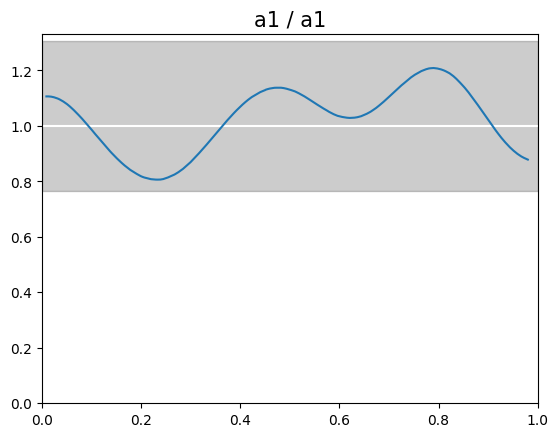

In [ ]:
a_pp = pm.sample_posterior_predictive(a_trace, model=a_model, random_seed=random_seed)
az.plot_bpv(a_pp)

<Axes: xlabel='a1 / a1'>

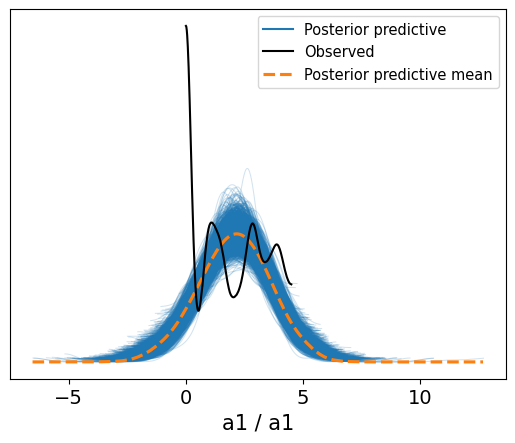

In [ ]:
az.plot_ppc(a_pp)

(e) Plot the posterior distributions for the parameters and discuss your
results. Plot the response variable vs. one of the predictors using
counterfactuals and discuss this plot.

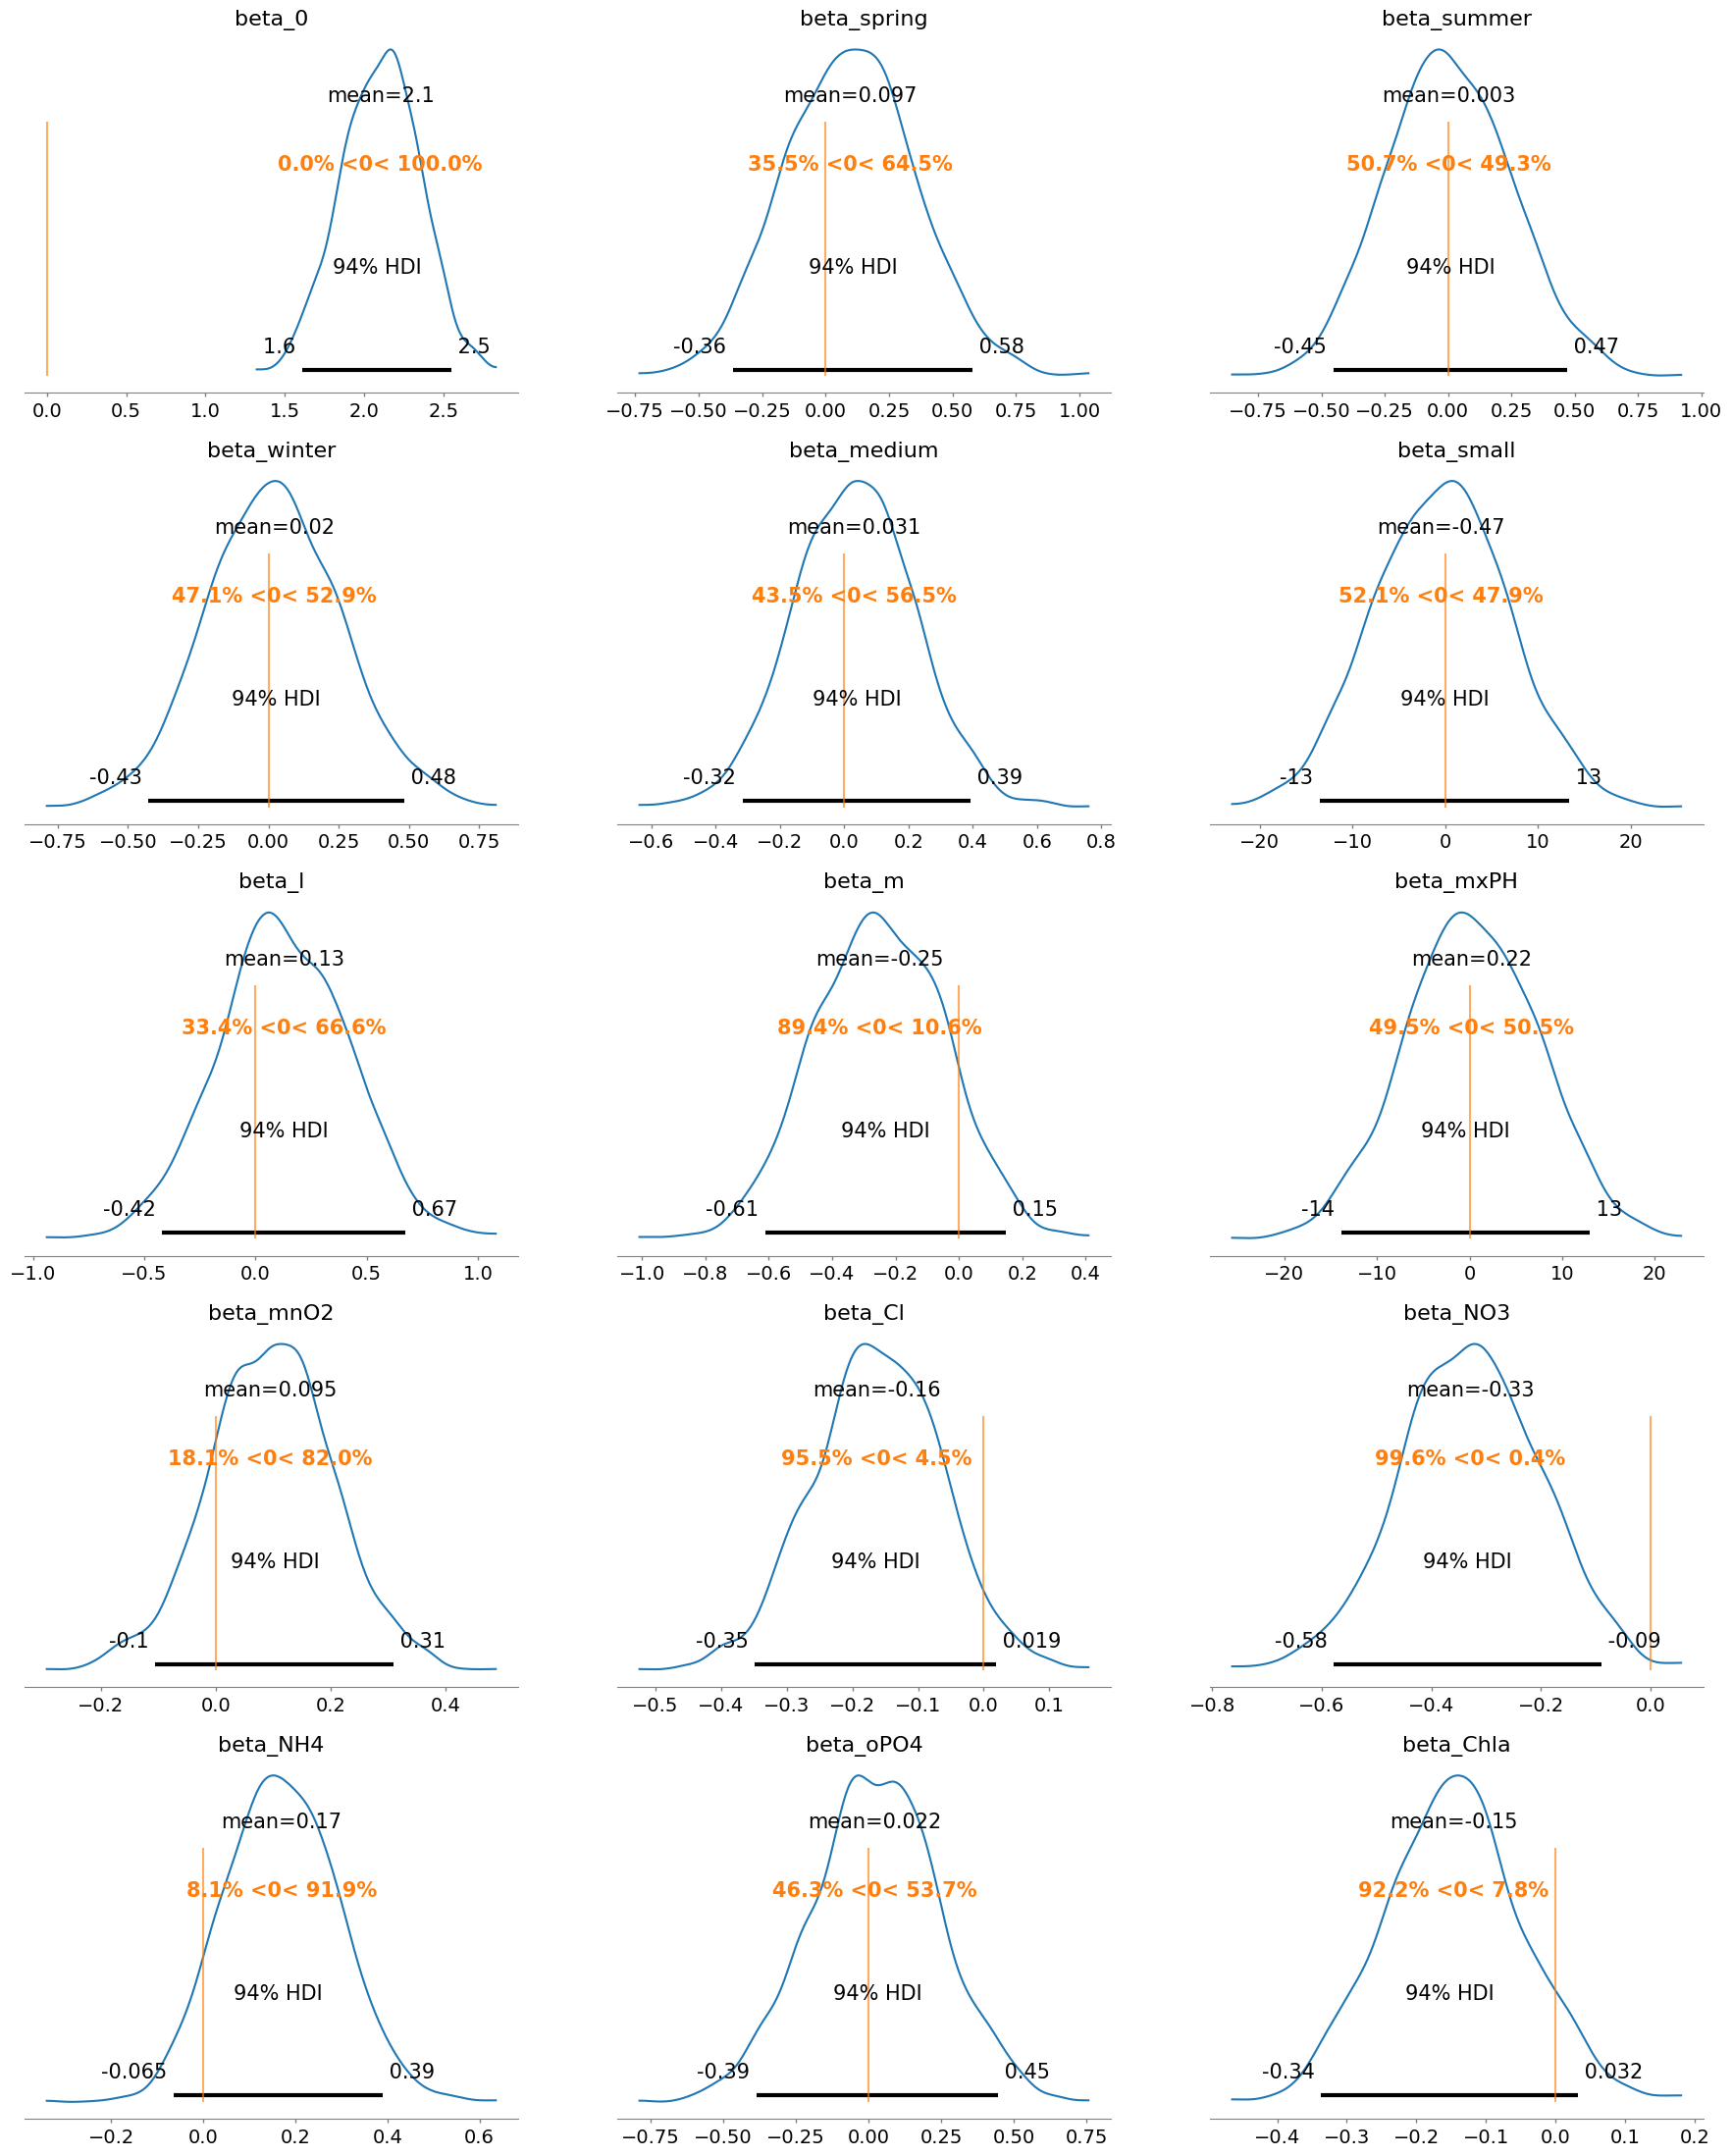

In [ ]:
with a_model:
    az.plot_posterior(trace_robust,
                      var_names = ["beta_0", "beta_spring",
                                   "beta_summer", "beta_winter",
                                   "beta_medium", "beta_small",
                                   "beta_l", "beta_m", "beta_mxPH", "beta_mnO2",
                                   "beta_Cl", "beta_NO3", "beta_NH4",
                                   "beta_oPO4", "beta_Chla"],
                      ref_val=0)

In [ ]:
with pm.Model() as a_pred_model:
  beta0 = pm.Normal('beta0', 0, 10)
  betaNO3 = pm.Normal('NO3', 0, 10)

  nu = pm.Exponential('nu', 1/30)
  sigma = pm.Uniform('sigma', 0, 10)

  zNO3 = pm.MutableData('zNO3', NO3_obs, dims='obs_id')

  mu = pm.Deterministic('mu', beta0+betaNO3*zNO3)

  a_zScores = pm.StudentT('a_zScores', nu=nu, mu=mu, sigma=sigma,
                          observed=a1_obs)

  a_pred_trace = pm.sample(random_seed=random_seed)

In [ ]:
with a_pred_model:
  a_ppc = pm.sample_posterior_predictive(a_pred_trace,
                                         var_names=['mu'],
                                         random_seed=random_seed)

In [ ]:
new_NO3 = np.linspace(-2, 2, num=200)

In [ ]:
with a_model:
  pm.set_data({'new_NO3':new_NO3})

  a_pp_pred = pm.sample_posterior_predictive(a_pred_trace,
                                             var_names=["mu"],
                                             return_inferencedata=True,
                                             predictions=True,
                                             extend_interfacedata=True,
                                             random_seed=random_seed)

KeyError: ignored

In [ ]:
_, ax = plt.subplots(figsize=(12,6))

preds_counterfactual = a_pp_pred.predictions_constant_data["new_NO3"]
model_preds = a_pp_pred.predictions

ax.vlines(preds_counterfactual,
          *az.hdi(model_preds)["mu"].transpose("hdi", ...),
          alpha=0.5)

ax.plot(preds_counterfactual,
        model_preds['mu'].mean(("chain","draw")),
        "sigma",
        ms=5,
        color="C1",
        alpha=0.5,
        label="Expected prob.")

(f) The data set, algaetest.csv, contains a test set. Build a second model
that may contain fewer predictors but should contain at least one
nonlinear element. Evaluate both models using ROC curves for the
test set. For the better performing model show the parameter posterior distributions.

In [ ]:
random_seed = 135573

spring_obs = aT.loc[:, "spring"]
summer_obs = aT.loc[:, "summer"]
winter_obs = aT.loc[:, "winter"]
mxPH_obs = aT.loc[:, "mxPH"]
mnO2_obs = aT.loc[:, "mnO2"]
Cl_obs = aT.loc[:, "Cl"]
NO3_obs = aT.loc[:, "NO3"]
NH4_obs = aT.loc[:, "NH4"]
PO4_obs = aT.loc[:, "PO4"]
Chla_obs = aT.loc[:, "Chla"]
a1_obs = aT.loc[:, "a1"]

with pm.Model() as a_model:

    spring = pm.Data("spring", spring_obs)
    summer = pm.Data("summer", summer_obs)
    winter = pm.Data("winter", winter_obs)
    mxPH = pm.Data("mxPH", mxPH_obs)
    mnO2 = pm.Data("mnO2", mnO2_obs)
    Cl = pm.Data("Cl", Cl_obs)
    NO3 = pm.Data("NO3", NO3_obs)
    NH4 = pm.Data("NH4", NH4_obs)
    PO4 = pm.Data("PO4", PO4_obs)
    Chla = pm.Data("Chla", Chla_obs)

    nu = pm.Exponential("nu", 1/20)
    sigma = pm.Uniform("sigma", 0, 10)
    beta_0 = pm.Normal("beta_0", 0, 10)
    beta_spring = pm.Normal("beta_spring", 0, 10)
    beta_summer = pm.Normal("beta_summer", 0, 10)
    beta_winter = pm.Normal("beta_winter", 0, 10)
    beta_mxPH = pm.Normal("beta_mxPH", 0, 10)
    beta_mnO2 = pm.Normal("beta_mnO2", 0, 10)
    beta_Cl = pm.Normal("beta_Cl", 0, 10)
    beta_NO3 = pm.Normal("beta_NO3", 0, 10)
    beta_NH4 = pm.Normal("beta_NH4", 0, 10)
    beta_PO4 = pm.Normal("beta_PO4", 0, 10)
    beta_Chla = pm.Normal("beta_Chla", 0, 10)

    mu = pm.Deterministic("mu", beta_0 + \
                         beta_spring * spring + beta_summer * summer + \
                         beta_winter * winter + \
                         beta_mxPH * mxPH + beta_mnO2 * mnO2 + \
                         beta_Cl * Cl + beta_NO3 * NO3 + beta_NH4 * NH4 + \
                         beta_PO4 * PO4 + beta_Chla * Chla)

    a1 = pm.StudentT("a1", mu=mu, sigma=sigma, nu=nu, observed = a1_obs)

    a_trace = pm.sample(draws=2000, tune=4000, cores = 8,
                        random_seed=random_seed, return_inferencedata = False)

    trace_robust = pm.to_inference_data(trace=a_trace, log_likelihood=True)

    a_pp_sqrt = pm.sample_posterior_predictive(trace_robust,
                                           random_seed = random_seed)

(a) Perform a simple exploratory analysis of the data by at least viewing
summary statistics. Comment on what the EDA implies for your
analysis.

In [ ]:
data1.head()

In [ ]:
data1.columns

In [ ]:
summary_stats = (data1.loc[:, ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity',
       'alcohol', 'age']]
                         .agg(["mean", "std", "count"]))
summary_stats

In [ ]:
df = data1.loc[:, ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity',
       'alcohol', 'age']]
df = df.melt(var_name='cols',  value_name='vals')

sns.displot(kind='kde', data=df, col='cols', col_wrap=4, x='vals', hue="cols", facet_kws={'sharey': False, 'sharex': False})

In [ ]:
df = data1[["famhist", "chd"]]
sns.countplot(x="famhist", hue="chd", data=data1)

(b) Preprocess the data by scaling the predictor variables using a ztransformation (subtract the mean divide by the standard deviation).
Explain why this is appropriate. Code the categorical variables and
explain your coding.

In [ ]:
data1.sbp = (data1.sbp-data1.sbp.mean())/data1.sbp.std()
data1.tobacco = (data1.tobacco-data1.tobacco.mean())/data1.tobacco.std()
data1.ldl = (data1.ldl-data1.ldl.mean())/data1.ldl.std()
data1.adiposity = (data1.adiposity-data1.adiposity.mean())/data1.adiposity.std()
data1.typea = (data1.typea-data1.typea.mean())/data1.typea.std()
data1.obesity = (data1.obesity-data1.obesity.mean())/data1.obesity.std()
data1.alcohol = (data1.alcohol-data1.alcohol.mean())/data1.alcohol.std()
data1.age = (data1.age-data1.age.mean())/data1.age.std()

data1.famhist = pd.get_dummies(data1.famhist, drop_first=True)

In [ ]:
data1.head()

### Answer 3.B

We can scale with this method because

(c) Develop and use Bayesian GLM model with all the predictor variables. Explain your choice of priors and their parameters. Show the
graphical representation of your model.

(d) Evaluate both the sampling used by your model, as well as, the prior
and posterior predictive results.


(e) Provide plots of the posterior distributions for the parameters and
discuss what these results imply for the relevant predictor variables
and the overall model. Show posterior analyses to include relevant
odds ratio(s) and describe what this analysis means for the goal of
your study.

(f) Develop a second model to help in your study of this problem. This
new model can use fewer predictor variables but must contain at
least one nonlinear component. Explain your choice of priors and
their parameters, and show the graphical representation of your new
model.


(g) For the second model evaluate the sampling and choice of priors using
Bayesian p-value and posterior predictive plots. Briefly explain your
results.

(h) For the second model provide plots of the posterior distributions for
the parameters and discuss what these results imply for the relevant
predictor variables and the overall model. Show posterior analyses to
include relevant odds ratio(s) and describe what this analysis means
for the goal of your study.


(i) Compare the two models using leave-one-out cross validation

(j) Briefly summarize your analysis and provide an answer to the South
African Health ministry to the question implied by their goal statement.